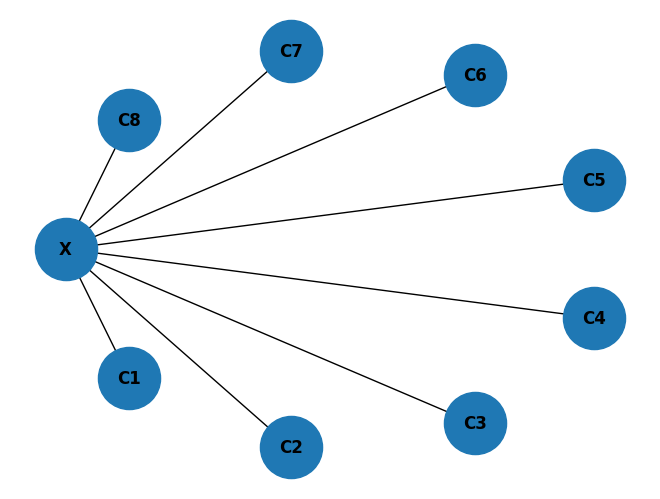

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes for capacitors and reactance
capacitors = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']
reactance = 'X'

G.add_node(reactance)

# Add edges to represent connections
edges = [(reactance, capacitor) for capacitor in capacitors]

G.add_edges_from(edges)

# Draw the graph
pos = nx.shell_layout(G)  # Shell layout arranges nodes in concentric circles
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=2000)
plt.show()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes for capacitors and reactance
capacitors = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']
reactance = 'X'

G.add_nodes_from(capacitors + [reactance])

# Add directed edges from reactance to each capacitor
edges = [('X', capacitor) for capacitor in capacitors]

G.add_edges_from(edges)

# Draw the graph
pos = nx.multipartite_layout(G, subset_key="layer")
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=2000)
plt.show()


ValueError: ignored

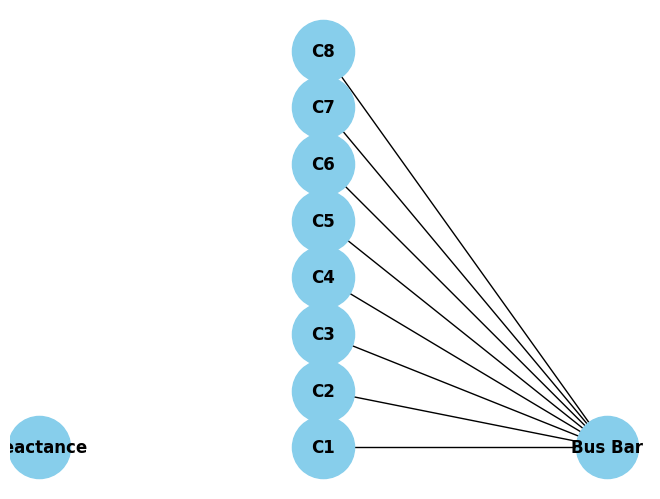

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Nodes
reactance = 'Reactance'
bus_bar = 'Bus Bar'
capacitors = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']

G.add_nodes_from([reactance, bus_bar] + capacitors)

# Edges
for capacitor in capacitors:
    G.add_edge(bus_bar, capacitor)  # Bus Bar connected to each capacitor

# Draw the graph
pos = {'Reactance': (0, 0)}  # Setting position for Reactance
for i, capacitor in enumerate(capacitors):
    pos[capacitor] = (1, i)  # Setting positions for capacitors in a line
pos[bus_bar] = (2, 0)  # Setting position for Bus Bar

nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=2000, node_color='skyblue', arrows=False)
plt.show()


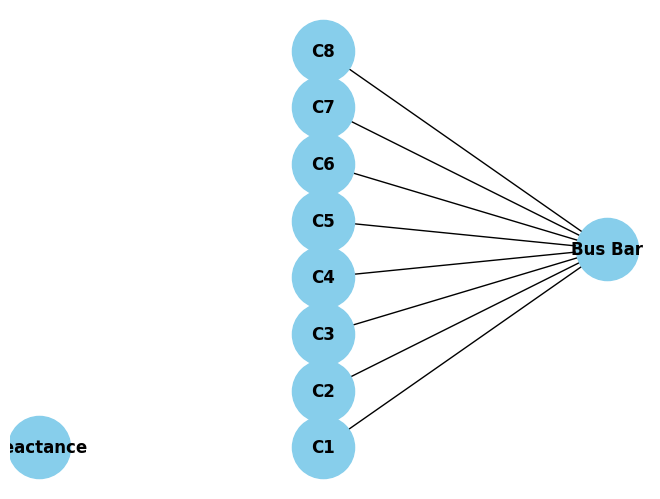

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Nodes
reactance = 'Reactance'
bus_bar = 'Bus Bar'
capacitors = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']

G.add_nodes_from([reactance, bus_bar] + capacitors)

# Edges
for capacitor in capacitors:
    G.add_edge(bus_bar, capacitor)  # Bus Bar connected to each capacitor

# Draw the graph
pos = {'Reactance': (0, 0)}  # Setting position for Reactance
for i, capacitor in enumerate(capacitors):
    pos[capacitor] = (1, i)  # Setting positions for capacitors in a vertical line

# Calculate the middle position for Bus Bar
middle_position = sum([pos[cap][1] for cap in capacitors]) / len(capacitors)
pos[bus_bar] = (2, middle_position)

nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=2000, node_color='skyblue', arrows=False)

#


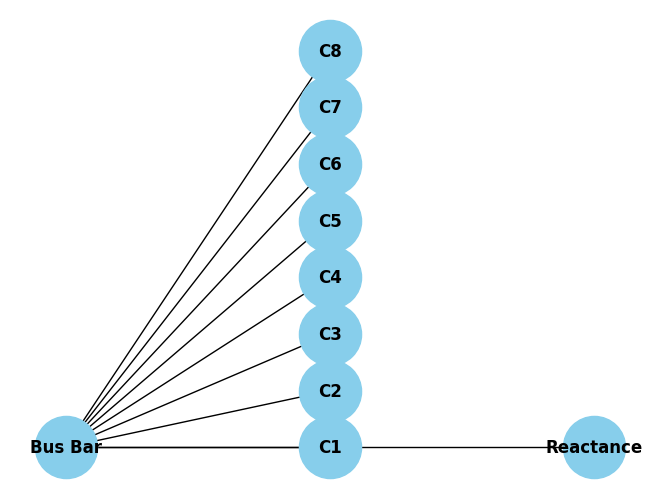

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Nodes
reactance = 'Reactance'
bus_bar = 'Bus Bar'
capacitors = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']

G.add_nodes_from([reactance, bus_bar] + capacitors)

# Edges
for capacitor in capacitors:
    G.add_edge(bus_bar, capacitor)  # Bus Bar connected to each capacitor
G.add_edge(bus_bar, reactance)  # Bus Bar connected to Reactance

# Draw the graph
pos = {'Bus Bar': (0, 0)}  # Setting position for Bus Bar
for i, capacitor in enumerate(capacitors):
    pos[capacitor] = (1, i)  # Setting positions for capacitors in a vertical line
pos[reactance] = (2, 0)  # Setting position for Reactance to the right of Bus Bar

nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=2000, node_color='skyblue', arrows=False)

# Remove axis ticks for clarity
plt.xticks([])
plt.yticks([])

plt.show()


In [ ]:
import itertools

def find_combination(target, capacitors):
    best_combination = None
    best_error = float('inf')

    for r in range(1, len(capacitors) + 1):
        for combo in itertools.combinations(capacitors, r):
            total = sum(combo)
            error = abs(total - target)
            if error < best_error:
                best_combination = combo
                best_error = error

    return best_combination

# Set of available capacitor values (replace with actual values)
capacitor_values = [1.0, 1.2, 1.5, 1.8, 2.2, 2.7, 3.3, 3.9, 4.7, 5.6, 6.8, 8.2]

# Target reactive power values (replace with your values)
target_reactive_powers = [13.9, 16.6, 11.1, 19.4, 22.2, 25.0, 8.3, 27.8, 30.6, 5.5]

# Find the best combination for each target reactive power
for target in target_reactive_powers:
    combination = find_combination(target, capacitor_values)
    print(f"For target reactive power {target} VARs, best combination: {combination}")


For target reactive power 13.9 VARs, best combination: (1.0, 1.2, 2.2, 2.7, 6.8)
For target reactive power 16.6 VARs, best combination: (1.0, 2.7, 4.7, 8.2)
For target reactive power 11.1 VARs, best combination: (1.0, 3.3, 6.8)
For target reactive power 19.4 VARs, best combination: (1.0, 1.2, 2.2, 6.8, 8.2)
For target reactive power 22.2 VARs, best combination: (3.3, 3.9, 6.8, 8.2)
For target reactive power 25.0 VARs, best combination: (1.0, 1.2, 2.2, 5.6, 6.8, 8.2)
For target reactive power 8.3 VARs, best combination: (1.5, 6.8)
For target reactive power 27.8 VARs, best combination: (1.0, 1.5, 4.7, 5.6, 6.8, 8.2)
For target reactive power 30.6 VARs, best combination: (1.0, 2.7, 3.3, 3.9, 4.7, 6.8, 8.2)
For target reactive power 5.5 VARs, best combination: (2.2, 3.3)


In [ ]:
import itertools

def find_combination(target, capacitors):
    best_combination = None
    best_error = float('inf')

    for r in range(1, len(capacitors) + 1):
        for combo in itertools.combinations(capacitors, r):
            total = sum(combo)
            error = abs(total - target)
            if error < best_error:
                best_combination = combo
                best_error = error

    return best_combination

# Provided capacitor values
all_capacitor_values = [
    1.0, 1.1, 1.2, 1.3, 1.5, 1.6, 1.8, 2.0, 2.2, 2.4,
    2.7, 3.0, 3.3, 3.6, 3.9, 4.3, 4.7, 5.1, 5.6, 6.2,
    6.8, 7.5,7.7, 8.2, 9.1
]

# Provided target reactive power values
target_reactive_powers = [13.9, 16.6, 11.1, 19.4, 22.2, 25.0, 8.3, 27.8, 30.6]

# Find the best combination for each target reactive power
best_combinations = []
for target in target_reactive_powers:
    combination = find_combination(target, all_capacitor_values)
    best_combinations.append(combination)

for i, target in enumerate(target_reactive_powers):
    best_combination = best_combinations[i]
    total_sum = sum(best_combination) if best_combination else 0
    print(f"For target reactive power {target} VARs, best combination: {best_combination}, sum: {total_sum}")

# Flatten the list of combinations and remove duplicates
unique_values = list(set(value for combination in best_combinations for value in combination if value is not None))

# Output the unique values
print("Unique Capacitor Values:")

print(sorted(unique_values))

For target reactive power 13.9 VARs, best combination: (3.0, 4.7, 6.2), sum: 13.9
For target reactive power 16.6 VARs, best combination: (7.5, 9.1), sum: 16.6
For target reactive power 11.1 VARs, best combination: (2.0, 9.1), sum: 11.1
For target reactive power 19.4 VARs, best combination: (4.7, 5.6, 9.1), sum: 19.4
For target reactive power 22.2 VARs, best combination: (5.6, 7.5, 9.1), sum: 22.2
For target reactive power 25.0 VARs, best combination: (1.5, 6.2, 8.2, 9.1), sum: 25.0
For target reactive power 8.3 VARs, best combination: (1.5, 6.8), sum: 8.3
For target reactive power 27.8 VARs, best combination: (1.0, 4.3, 6.8, 7.5, 8.2), sum: 27.8
For target reactive power 30.6 VARs, best combination: (1.0, 6.2, 6.8, 7.5, 9.1), sum: 30.6
Unique Capacitor Values:
[1.0, 1.5, 2.0, 3.0, 4.3, 4.7, 5.6, 6.2, 6.8, 7.5, 8.2, 9.1]


In [ ]:
import itertools

def find_combination(target, capacitors):
    best_combination = None
    best_error = float('inf')

    for r in range(1, len(capacitors) + 1):
        for combo in itertools.combinations(capacitors, r):
            total = sum(combo)
            error = abs(total - target)
            if error < best_error:
                best_combination = combo
                best_error = error

    return best_combination

# Provided capacitor values
all_capacitor_values = [
    1.0, 1.1, 1.2, 1.3, 1.5, 1.6, 1.8, 2.0, 2.2, 2.4,
    2.7, 3.0, 3.3, 3.6, 3.9, 4.3, 4.7, 5.1, 5.6, 6.2,
    6.8, 7.5, 8.2, 9.1,10
]
# Provided target reactive power values
target_reactive_powers = [13.9, 16.6, 11.1, 19.4, 22.2, 25.0, 8.3, 27.8, 30.6, 5.5]

# Find the best combination for each target reactive power
best_combinations = []
for target in target_reactive_powers:
    combination = find_combination(target, all_capacitor_values)
    best_combinations.append(combination)



Unique Capacitor Values:
[1.1, 1.2, 1.5, 3.3, 3.9, 4.3, 4.7, 5.6, 6.8, 7.5, 8.2, 9.1, 10]


[1.0, 1.2, 1.5, 2.0, 3.0, 4.3, 4.7, 5.6, 6.2, 6.8, 7.5, 8.2, 9.1]


In [ ]:
import itertools

def find_combination(target, capacitors):
    best_combination = None
    best_error = float('inf')

    for r in range(1, len(capacitors) + 1):
        for combo in itertools.combinations(capacitors, r):
            total = sum(combo)
            error = abs(total - target)
            if error < best_error:
                best_combination = combo
                best_error = error

    return best_combination

# Provided capacitor values
all_capacitor_values = [1.0, 1.1, 1.2, 1.3, 1.5, 1.6, 1.8, 2.0, 2.2, 2.4, 2.7, 3.0, 3.3, 3.6, 3.9, 4.3, 4.7, 5.1, 5.6, 6.2, 6.8, 7.5, 8.2, 9.1]

# Provided target reactive power values
target_reactive_powers = [13.9, 16.6, 11.1, 19.4, 22.2, 25.0, 8.3, 27.8, 30.6, 5.5]

# Find the best combination for each target reactive power
best_combinations = []
for target in target_reactive_powers:
    combination = find_combination(target, all_capacitor_values)
    best_combinations.append(combination)

# Flatten the list of combinations and remove duplicates
unique_values = list(set(round(value, 1) for combination in best_combinations for value in combination if value is not None))

# Output the unique values
print("Unique Capacitor Values (rounded to 1 decimal place):")
print(unique_values)


Unique Capacitor Values (rounded to 1 decimal place):
[1.5, 2.0, 3.0, 4.7, 5.6, 6.2, 7.5, 8.2, 9.1, 6.8, 1.0, 4.3, 1.2]
